In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data= pd.read_csv('application_train.csv')
test_data= pd.read_csv('application_test.csv')

In [3]:
large = 18; med = 14; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

In [4]:
train_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
train_data.shape

(307511, 122)

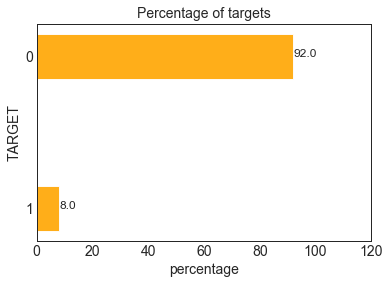

In [6]:
target1=round((train_data.loc[train_data['TARGET']==1, 'TARGET']).count()/len(train_data),2)*100
target0=round((train_data.loc[train_data['TARGET']==0, 'TARGET']).count()/len(train_data),2)*100
price=[target1, target0]
plt.barh(range(2), price, height=0.3, color='orange', alpha=0.9) 
plt.yticks(range(2), ['1', '0'])
plt.xlim(0,120)
plt.xlabel("percentage")
plt.ylabel("TARGET")
plt.title("Percentage of targets")
for x, y in enumerate(price):
    plt.text(y+0.1 , x, '%s' % y, size=12)
plt.show()

In [7]:
train_only = train_data.drop(['TARGET'], axis=1)

#### DAYS_BIRTH

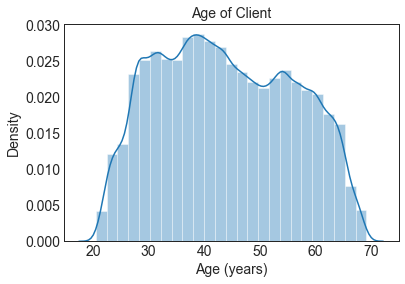

In [8]:
sns.distplot(-train_data['DAYS_BIRTH'] / 365, bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Density');

In [9]:
(train_data['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

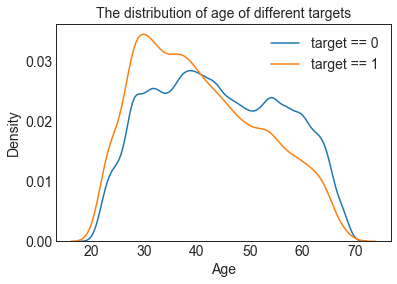

In [10]:
sns.kdeplot(-(train_data.loc[train_data['TARGET'] == 0, 'DAYS_BIRTH']/365), label = 'target == 0')

sns.kdeplot(-(train_data.loc[train_data['TARGET'] == 1, 'DAYS_BIRTH']/365), label = 'target == 1')

plt.xlabel('Age'); plt.ylabel('Density'); plt.title('The distribution of age of different targets');

#### DAYS_EMPLOYED

Text(0.5, 0, 'Days Employment')

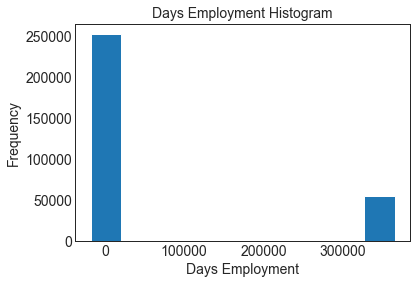

In [11]:
(train_data['DAYS_EMPLOYED']).describe()
train_data['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment')

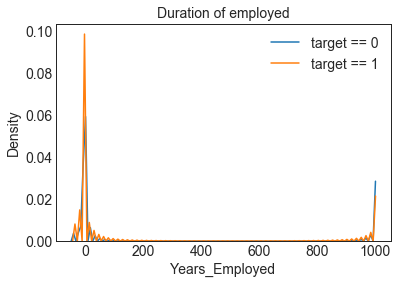

In [12]:
sns.kdeplot((train_data.loc[train_data['TARGET'] == 0, 'DAYS_EMPLOYED']/365), label = 'target == 0')

sns.kdeplot((train_data.loc[train_data['TARGET'] == 1, 'DAYS_EMPLOYED']/365), label = 'target == 1')

plt.xlabel('Years_Employed'); plt.ylabel('Density'); plt.title('Duration of employed');

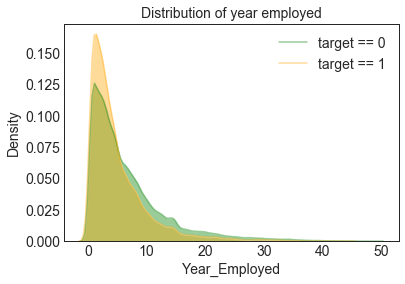

In [13]:
#train_data['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
#less than 365243
sns.kdeplot(-(train_data[train_data['DAYS_EMPLOYED']<365243].loc[train_data['TARGET'] == 0, 'DAYS_EMPLOYED'] / 365), shade=True, color="g", label = 'target == 0', alpha=.4)

sns.kdeplot(-(train_data[train_data['DAYS_EMPLOYED']<365243].loc[train_data['TARGET'] == 1, 'DAYS_EMPLOYED'] / 365), label = 'target == 1', shade=True, color="orange", alpha=.4)

plt.xlabel('Year_Employed'); plt.ylabel('Density'); plt.title('Distribution of year employed');

In [14]:
(train_data.loc[train_data['TARGET']==0, 'TARGET']).count()/len(train_data)

0.9192711805431351

In [15]:
(train_data.loc[train_data['TARGET']==1, 'TARGET']).count()/len(train_data)

0.08072881945686496

In [16]:
Larget_days_employed=train_data[train_data['DAYS_EMPLOYED']==365243]
T0=(Larget_days_employed.loc[Larget_days_employed['TARGET'] == 0, 'DAYS_EMPLOYED']).count()/len(Larget_days_employed)

T1=(Larget_days_employed.loc[Larget_days_employed['TARGET'] == 1, 'DAYS_EMPLOYED']).count()/len(Larget_days_employed)

print(T0, T1)


0.946003539567306 0.05399646043269404


#### Correlations

In [17]:
correlations = train_data.corr()['TARGET'].sort_values()
correlations.head(5)

EXT_SOURCE_3    -0.178919
EXT_SOURCE_2    -0.160472
EXT_SOURCE_1    -0.155317
DAYS_EMPLOYED   -0.044932
FLOORSMAX_AVG   -0.044003
Name: TARGET, dtype: float64

In [18]:
correlations.tail(20)

OBS_30_CNT_SOCIAL_CIRCLE       0.009131
CNT_FAM_MEMBERS                0.009308
CNT_CHILDREN                   0.019187
AMT_REQ_CREDIT_BUREAU_YEAR     0.019930
FLAG_WORK_PHONE                0.028524
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

#### EXT_SOURCE

/Users/fuxia/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/fuxia/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


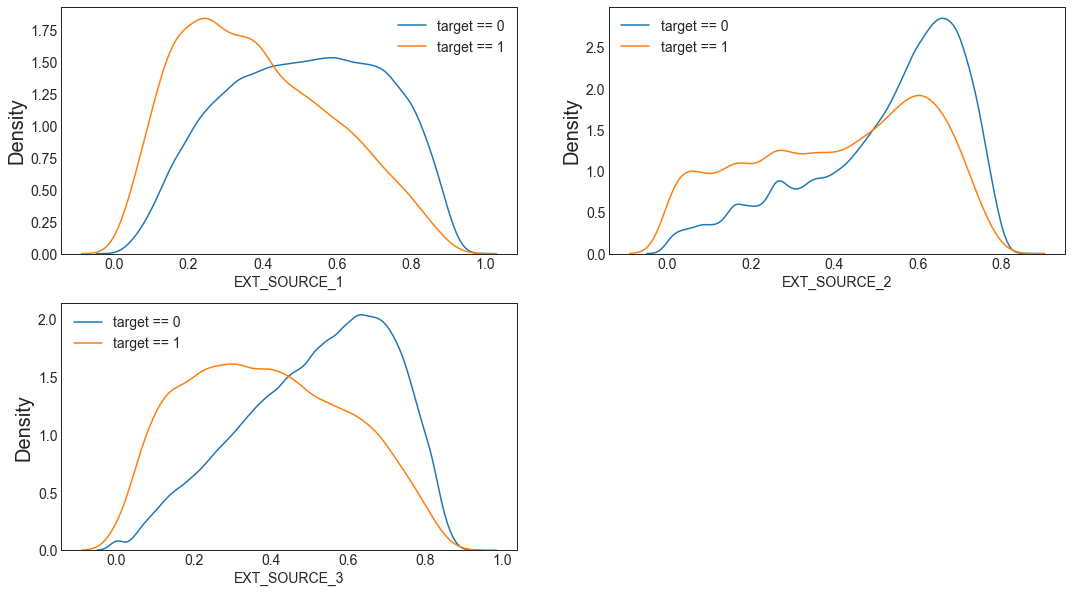

In [19]:
plt.rcParams['figure.figsize'] = (18, 10)           
f = plt.figure() 
f.add_subplot(2,2,1)
sns.kdeplot((train_data.loc[train_data['TARGET'] == 0, 'EXT_SOURCE_1']), label = 'target == 0')

sns.kdeplot((train_data.loc[train_data['TARGET'] == 1, 'EXT_SOURCE_1'] ), label = 'target == 1')

plt.xlabel('EXT_SOURCE_1'); plt.ylabel('Density', size=20); 

f.add_subplot(2,2,2)
sns.kdeplot((train_data.loc[train_data['TARGET'] == 0, 'EXT_SOURCE_2']), label = 'target == 0')

sns.kdeplot((train_data.loc[train_data['TARGET'] == 1, 'EXT_SOURCE_2'] ), label = 'target == 1')

plt.xlabel('EXT_SOURCE_2'); plt.ylabel('Density',size=20);

f.add_subplot(2,2,3)
sns.kdeplot((train_data.loc[train_data['TARGET'] == 0, 'EXT_SOURCE_3']), label = 'target == 0')

sns.kdeplot((train_data.loc[train_data['TARGET'] == 1, 'EXT_SOURCE_3'] ), label = 'target == 1')

plt.xlabel('EXT_SOURCE_3'); plt.ylabel('Density', size=20); 

#### AMT_INCOME_TOTAL

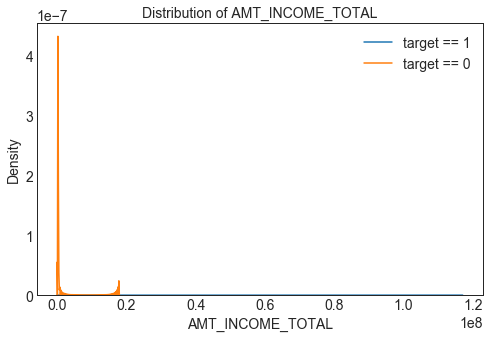

In [23]:
plt.rcParams['figure.figsize'] = (8, 5) 
sns.kdeplot(train_data.loc[train_data['TARGET']==1, 'AMT_INCOME_TOTAL'], label = 'target == 1')

sns.kdeplot(train_data.loc[train_data['TARGET']==0, 'AMT_INCOME_TOTAL'], label = 'target == 0')

plt.xlabel('AMT_INCOME_TOTAL');
plt.ylabel('Density'); plt.title('Distribution of AMT_INCOME_TOTAL');

In [24]:
(train_data['AMT_INCOME_TOTAL']).describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [238]:
train_data.loc[train_data['AMT_INCOME_TOTAL']>10000000, : ]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CONTRACT_TYPE
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
203693,336147,0,Cash loans,M,Y,Y,2,18000090.0,675000.0,69295.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
246858,385674,0,Cash loans,M,Y,Y,0,13500000.0,1400503.5,130945.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0


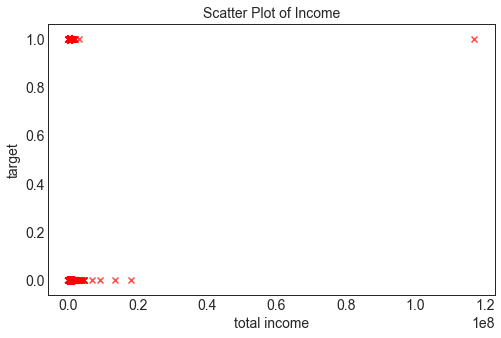

In [214]:
plt.rcParams['figure.figsize'] = (8, 5) 
plt.scatter(train_data['AMT_INCOME_TOTAL'], train_data['TARGET'], marker='x',
            color='red', alpha=0.7, label='x1 samples')
plt.xlabel('total income')
plt.ylabel('target')
plt.title('Scatter Plot of Income');

In [204]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = application_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = application_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,6))
    else:fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10,12))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2,x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
        plt.ylabel('Percent of target with value 1 [%]', fontsize=15)
        plt.tick_params(axis='both', which='major', labelsize=13)
    
    plt.show();

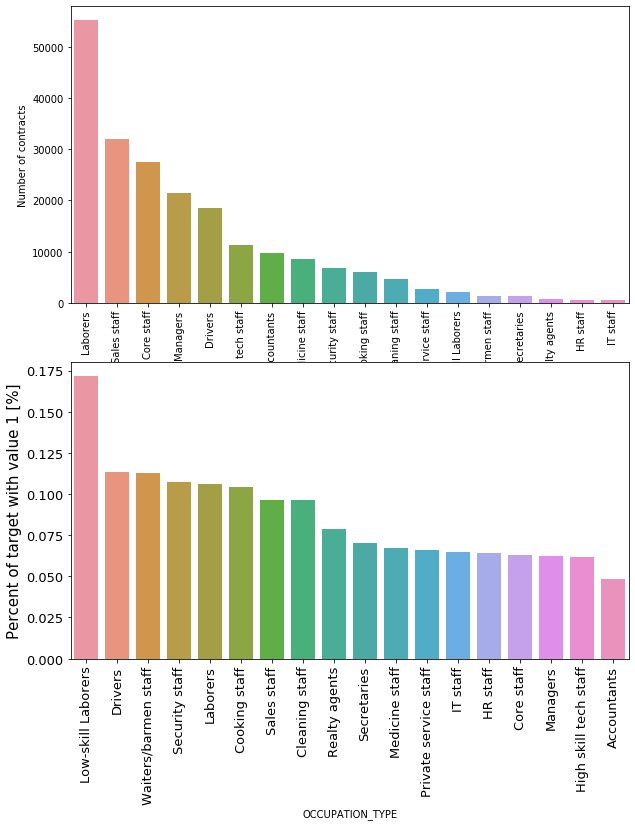

In [205]:
application_train= pd.read_csv('application_train.csv')
plot_stats('OCCUPATION_TYPE',True, False)

In [ ]:
plot_stats('NAME_EDUCATION_TYPE',True)
plot_stats('NAME_HOUSING_TYPE',True)

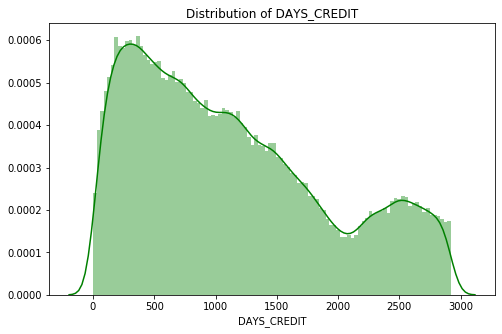

In [168]:
def plot_b_distribution(feature,color):
    plt.figure(figsize=(8,5))
    plt.title("Distribution of %s" % feature)
    sns.distplot(-merg_1[feature].dropna(),color=color, kde=True,bins=100)
    plt.show() 
    
plot_b_distribution('DAYS_CREDIT','green')

## data cleaning

In [8]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [9]:
X=pd.concat((train_data, test_data), axis=0, ignore_index=True)

/Users/fuxia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [10]:
print('train_data:',train_data.shape, 'test_data:',test_data.shape, 'total_data:', X.shape)

train_data: (307511, 122) test_data: (48744, 121) total_data: (356255, 122)


### bureau dataset preparation

In [11]:
bureau= pd.read_csv('bureau.csv')
bureau_balance= pd.read_csv('bureau_balance.csv')

In [12]:
missing_values_table(bureau)

Your selected dataframe has 17 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
AMT_ANNUITY,1226791,71.5
AMT_CREDIT_MAX_OVERDUE,1124488,65.5
DAYS_ENDDATE_FACT,633653,36.9
AMT_CREDIT_SUM_LIMIT,591780,34.5
AMT_CREDIT_SUM_DEBT,257669,15.0
DAYS_CREDIT_ENDDATE,105553,6.1
AMT_CREDIT_SUM,13,0.0


In [13]:
new_bureau=bureau.drop(columns=["DAYS_CREDIT_ENDDATE", "DAYS_ENDDATE_FACT", 
                                "AMT_CREDIT_MAX_OVERDUE" ,"AMT_CREDIT_SUM_DEBT",
                                "AMT_CREDIT_SUM_LIMIT","AMT_ANNUITY"])

In [14]:
new_bureau

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE
0,215354,5714462,Closed,currency 1,-497,0,0,91323.000,0.0,Consumer credit,-131
1,215354,5714463,Active,currency 1,-208,0,0,225000.000,0.0,Credit card,-20
2,215354,5714464,Active,currency 1,-203,0,0,464323.500,0.0,Consumer credit,-16
3,215354,5714465,Active,currency 1,-203,0,0,90000.000,0.0,Credit card,-16
4,215354,5714466,Active,currency 1,-629,0,0,2700000.000,0.0,Consumer credit,-21
5,215354,5714467,Active,currency 1,-273,0,0,180000.000,0.0,Credit card,-31
6,215354,5714468,Active,currency 1,-43,0,0,42103.800,0.0,Consumer credit,-22
7,162297,5714469,Closed,currency 1,-1896,0,0,76878.450,0.0,Consumer credit,-1710
8,162297,5714470,Closed,currency 1,-1146,0,0,103007.700,0.0,Consumer credit,-840
9,162297,5714471,Active,currency 1,-1146,0,0,4500.000,0.0,Credit card,-690


In [15]:
missing_values_table(bureau_balance)

Your selected dataframe has 3 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [16]:
merg_bureau=new_bureau.join(bureau_balance, how="left", lsuffix='SK_ID_BUREAU', rsuffix='SK_ID_BUREAU')

In [17]:
# join with train and test dataset
merg_1=X.join(merg_bureau, how="left", lsuffix='SK_ID_CURR', rsuffix='SK_ID_CURR')

#### installment and credit balance dataset

In [18]:
installment = pd.read_csv('installments_payments.csv')
credit = pd.read_csv('credit_card_balance.csv')

In [19]:
missing_values_table(installment)

Your selected dataframe has 8 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
DAYS_ENTRY_PAYMENT,2905,0.0
AMT_PAYMENT,2905,0.0


In [20]:
installment = installment.drop('DAYS_ENTRY_PAYMENT',1)
installment = installment.drop('AMT_PAYMENT',1)

In [21]:
missing_values_table(credit)

Your selected dataframe has 23 columns.
There are 9 columns that have missing values.


,Missing Values,% of Total Values
AMT_PAYMENT_CURRENT,767988,20.0
AMT_DRAWINGS_ATM_CURRENT,749816,19.5
AMT_DRAWINGS_OTHER_CURRENT,749816,19.5
AMT_DRAWINGS_POS_CURRENT,749816,19.5
CNT_DRAWINGS_ATM_CURRENT,749816,19.5
CNT_DRAWINGS_OTHER_CURRENT,749816,19.5
CNT_DRAWINGS_POS_CURRENT,749816,19.5
AMT_INST_MIN_REGULARITY,305236,7.9
CNT_INSTALMENT_MATURE_CUM,305236,7.9


In [22]:
credit=credit.drop(['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
                       'AMT_DRAWINGS_POS_CURRENT','AMT_INST_MIN_REGULARITY',
                       'AMT_PAYMENT_CURRENT','CNT_DRAWINGS_ATM_CURRENT','CNT_DRAWINGS_OTHER_CURRENT',
                       'CNT_DRAWINGS_POS_CURRENT','CNT_INSTALMENT_MATURE_CUM'],1)

In [23]:
credit_installment = credit.join(installment,how = 'left',lsuffix = 'SK_ID_CURR',rsuffix = 'SK_ID_CURR')

In [24]:
merg_CI= pd.read_csv('credit_installment.csv')

In [25]:
merg_2=merg_1.join(merg_CI, how="left", lsuffix='SK_ID_CURR', rsuffix='SK_ID_CURR')

#### POS_BALANCE AND PREVIOUS APPLICATION 

In [26]:
prec_app= pd.read_csv('previous_application.csv')
POS_cash= pd.read_csv('POS_cash_balance.csv')

In [27]:
missing_values_table(prec_app)

Your selected dataframe has 37 columns.
There are 16 columns that have missing values.


,Missing Values,% of Total Values
RATE_INTEREST_PRIMARY,1664263,99.6
RATE_INTEREST_PRIVILEGED,1664263,99.6
AMT_DOWN_PAYMENT,895844,53.6
RATE_DOWN_PAYMENT,895844,53.6
NAME_TYPE_SUITE,820405,49.1
DAYS_FIRST_DRAWING,673065,40.3
DAYS_FIRST_DUE,673065,40.3
DAYS_LAST_DUE_1ST_VERSION,673065,40.3
DAYS_LAST_DUE,673065,40.3
DAYS_TERMINATION,673065,40.3


In [28]:
prec_app=prec_app.drop(columns=['AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                                'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED',
                                'NAME_TYPE_SUITE','RATE_DOWN_PAYMENT','DAYS_FIRST_DUE',
                               'DAYS_LAST_DUE','DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL',
                               'AMT_DOWN_PAYMENT','DAYS_FIRST_DRAWING','DAYS_LAST_DUE_1ST_VERSION',
                               'CNT_PAYMENT'])

In [29]:
missing_values_table(POS_cash)

Your selected dataframe has 8 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
CNT_INSTALMENT_FUTURE,26087,0.3
CNT_INSTALMENT,26071,0.3


In [30]:
POS_cash=POS_cash.drop(columns=['CNT_INSTALMENT','CNT_INSTALMENT_FUTURE'])

In [31]:
merg_PC=prec_app.join(POS_cash, how="left", lsuffix='SK_ID_CURR', rsuffix='SK_ID_CURR')

In [32]:
merg_3=merg_2.join(merg_PC, how="left", lsuffix='SK_ID_CURR', rsuffix='SK_ID_CURR')

### deal with missing value

In [33]:
missing_values_table(merg_3).head()

Your selected dataframe has 185 columns.
There are 70 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_AVG,248360,69.7
COMMONAREA_MODE,248360,69.7
COMMONAREA_MEDI,248360,69.7
NONLIVINGAPARTMENTS_AVG,246861,69.3
NONLIVINGAPARTMENTS_MODE,246861,69.3


In [34]:
for col in (merg_3.loc[:, merg_3.isna().sum()>100000]):
    print(f"'{col}'" , end=',')

'APARTMENTS_AVG','APARTMENTS_MEDI','APARTMENTS_MODE','BASEMENTAREA_AVG','BASEMENTAREA_MEDI','BASEMENTAREA_MODE','COMMONAREA_AVG','COMMONAREA_MEDI','COMMONAREA_MODE','ELEVATORS_AVG','ELEVATORS_MEDI','ELEVATORS_MODE','EMERGENCYSTATE_MODE','ENTRANCES_AVG','ENTRANCES_MEDI','ENTRANCES_MODE','EXT_SOURCE_1','FLOORSMAX_AVG','FLOORSMAX_MEDI','FLOORSMAX_MODE','FLOORSMIN_AVG','FLOORSMIN_MEDI','FLOORSMIN_MODE','FONDKAPREMONT_MODE','HOUSETYPE_MODE','LANDAREA_AVG','LANDAREA_MEDI','LANDAREA_MODE','LIVINGAPARTMENTS_AVG','LIVINGAPARTMENTS_MEDI','LIVINGAPARTMENTS_MODE','LIVINGAREA_AVG','LIVINGAREA_MEDI','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_AVG','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_AVG','NONLIVINGAREA_MEDI','NONLIVINGAREA_MODE','OCCUPATION_TYPE','OWN_CAR_AGE','TOTALAREA_MODE','WALLSMATERIAL_MODE','YEARS_BEGINEXPLUATATION_AVG','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_AVG','YEARS_BUILD_MEDI','YEARS_BUILD_MODE',

In [35]:
merg_4=merg_3.drop(columns=['APARTMENTS_AVG','APARTMENTS_MEDI','APARTMENTS_MODE','BASEMENTAREA_AVG',
                            'BASEMENTAREA_MEDI','BASEMENTAREA_MODE','COMMONAREA_AVG','COMMONAREA_MEDI',
                            'COMMONAREA_MODE','ELEVATORS_AVG','ELEVATORS_MEDI','ELEVATORS_MODE',
                            'EMERGENCYSTATE_MODE','ENTRANCES_AVG','ENTRANCES_MEDI','ENTRANCES_MODE',
                            'EXT_SOURCE_1','FLOORSMAX_AVG','FLOORSMAX_MEDI','FLOORSMAX_MODE',
                            'FLOORSMIN_AVG','FLOORSMIN_MEDI','FLOORSMIN_MODE','FONDKAPREMONT_MODE',
                            'HOUSETYPE_MODE','LANDAREA_AVG','LANDAREA_MEDI','LANDAREA_MODE','LIVINGAPARTMENTS_AVG',
                            'LIVINGAPARTMENTS_MEDI','LIVINGAPARTMENTS_MODE','LIVINGAREA_AVG','LIVINGAREA_MEDI',
                            'LIVINGAREA_MODE','NONLIVINGAPARTMENTS_AVG','NONLIVINGAPARTMENTS_MEDI',
                            'NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_AVG','NONLIVINGAREA_MEDI','NONLIVINGAREA_MODE',
                            'OCCUPATION_TYPE','OWN_CAR_AGE','TOTALAREA_MODE','WALLSMATERIAL_MODE',
                            'YEARS_BEGINEXPLUATATION_AVG','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BEGINEXPLUATATION_MODE',
                            'YEARS_BUILD_AVG','YEARS_BUILD_MEDI','YEARS_BUILD_MODE'])

In [36]:
merg_4.shape

(356255, 135)

In [37]:
merg_4_dummy = pd.get_dummies(merg_4)
merg_4_dummy.shape

(356255, 385)

In [38]:
missing_values_table(merg_4_dummy)

Your selected dataframe has 385 columns.
There are 18 columns that have missing values.


,Missing Values,% of Total Values
EXT_SOURCE_3,69633,19.5
TARGET,48744,13.7
AMT_REQ_CREDIT_BUREAU_DAY,47568,13.4
AMT_REQ_CREDIT_BUREAU_HOUR,47568,13.4
AMT_REQ_CREDIT_BUREAU_MON,47568,13.4
AMT_REQ_CREDIT_BUREAU_QRT,47568,13.4
AMT_REQ_CREDIT_BUREAU_WEEK,47568,13.4
AMT_REQ_CREDIT_BUREAU_YEAR,47568,13.4
OBS_60_CNT_SOCIAL_CIRCLE,1050,0.3
DEF_30_CNT_SOCIAL_CIRCLE,1050,0.3


In [39]:
merg_4_dummy.loc[merg_4_dummy.EXT_SOURCE_3.isnull(), 'EXT_SOURCE_3']=-1
merg_4_dummy.loc[merg_4_dummy.EXT_SOURCE_2.isnull(), 'EXT_SOURCE_2']=-1
merg_4_dummy.loc[merg_4_dummy.AMT_REQ_CREDIT_BUREAU_DAY.isnull(), 'AMT_REQ_CREDIT_BUREAU_DAY']=0
merg_4_dummy.loc[merg_4_dummy.AMT_REQ_CREDIT_BUREAU_QRT.isnull(), 'AMT_REQ_CREDIT_BUREAU_QRT']=0
merg_4_dummy.loc[merg_4_dummy.AMT_REQ_CREDIT_BUREAU_HOUR.isnull(), 'AMT_REQ_CREDIT_BUREAU_HOUR']=0
merg_4_dummy.loc[merg_4_dummy.AMT_REQ_CREDIT_BUREAU_YEAR.isnull(), 'AMT_REQ_CREDIT_BUREAU_YEAR']=0
merg_4_dummy.loc[merg_4_dummy.AMT_REQ_CREDIT_BUREAU_WEEK.isnull(), 'AMT_REQ_CREDIT_BUREAU_WEEK']=0
merg_4_dummy.loc[merg_4_dummy.AMT_REQ_CREDIT_BUREAU_MON.isnull(), 'AMT_REQ_CREDIT_BUREAU_MON']=0

merg_4_dummy.loc[merg_4_dummy.DEF_30_CNT_SOCIAL_CIRCLE.isnull(), 'DEF_30_CNT_SOCIAL_CIRCLE']=-1
merg_4_dummy.loc[merg_4_dummy.DEF_60_CNT_SOCIAL_CIRCLE.isnull(), 'DEF_60_CNT_SOCIAL_CIRCLE']=-1
merg_4_dummy.loc[merg_4_dummy.OBS_30_CNT_SOCIAL_CIRCLE.isnull(), 'OBS_30_CNT_SOCIAL_CIRCLE']=-1
merg_4_dummy.loc[merg_4_dummy.OBS_60_CNT_SOCIAL_CIRCLE.isnull(), 'OBS_60_CNT_SOCIAL_CIRCLE']=-1

In [40]:
merg_4_dummy.loc[merg_4_dummy.AMT_GOODS_PRICE.isnull(), 'AMT_GOODS_PRICE']=merg_4_dummy.AMT_GOODS_PRICE.mean()
merg_4_dummy.loc[merg_4_dummy.AMT_ANNUITY.isnull(), 'AMT_ANNUITY']=merg_4_dummy.AMT_ANNUITY.median()
merg_4_dummy.loc[merg_4_dummy.CNT_FAM_MEMBERS.isnull(), 'CNT_FAM_MEMBERS']=merg_4_dummy.CNT_FAM_MEMBERS.mean()
merg_4_dummy.loc[merg_4_dummy.AMT_CREDIT_SUM.isnull(), 'AMT_CREDIT_SUM']=merg_4_dummy.AMT_CREDIT_SUM.mean()
merg_4_dummy.loc[merg_4_dummy.DAYS_LAST_PHONE_CHANGE.isnull(), 'DAYS_LAST_PHONE_CHANGE']=merg_4_dummy.DAYS_LAST_PHONE_CHANGE.mean()

In [41]:
train_data_clean=merg_4_dummy[0:len(train_data)]
test_data_clean=merg_4_dummy[len(train_data):]

In [54]:
X_only=train_data_clean.drop(columns=['TARGET'])

## PCA

In [42]:
X_pca=train_data_clean.drop(columns=['TARGET'])
Y=train_data_clean.TARGET

In [43]:
from sklearn.decomposition import PCA
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'cumulative explained variance')

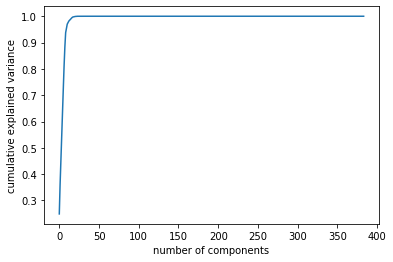

In [76]:
pca = PCA().fit(X_pca) 
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [44]:
pca=PCA(0.9999999).fit(X_pca)
pca.n_components_

36

In [ ]:
print iris.feature_names

In [45]:
train_pca = pd.DataFrame(pca.transform(X_pca))

# MODELS

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [47]:
train_X, test_X, train_y, test_y = train_test_split(train_pca, Y, 
                                                    train_size=0.7,
                                                    test_size=0.3,
                                                    random_state=99)

In [55]:
train_X_ori, test_X_ori, train_y_ori, test_y_ori = train_test_split(X_only, Y, 
                                                    train_size=0.7,
                                                    test_size=0.3,
                                                    random_state=99)

### 1. null model

In [49]:
y_null = pd.Series([0]*test_y.size)
y_null2 = pd.Series([0.5]*test_y.size)
print('Accuracy score:',accuracy_score(test_y, y_null))
print('ROC score:',roc_auc_score(test_y, y_null2))

Accuracy score: 0.9190604201443839
ROC score: 0.5


### 2. Logistic model

In [173]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(train_X, train_y)
print('Accuracy:',clf.score(test_X, test_y))

/Users/fuxia/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.552832397511219


/Users/fuxia/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [174]:
Y_pred_prob=clf.predict_proba(test_X)
print('ROC score:',roc_auc_score(test_y, Y_pred_prob[:, 1]))

ROC score: 0.6101298858343817


### 3. Decision tree

In [76]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=6,max_leaf_nodes=100,min_samples_leaf=20, random_state=99)
dtc.fit(train_X , train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=100,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=99, splitter='best')

In [77]:
print('Accuracy:', dtc.score(test_X, test_y))

Accuracy: 0.9190387408676046


In [78]:
dtc_prob=dtc.predict_proba(test_X, check_input=True)
print('ROC score:',roc_auc_score(test_y, dtc_prob[:, 1]))

ROC score: 0.6243591940881535


In [ ]:
dtc_ori.fit(train_X_ori , train_y_ori)

In [86]:
dtc_prob_ori=dtc_ori.predict_proba(test_X_ori, check_input=True)
print('ROC score:',roc_auc_score(test_y_ori, dtc_prob_ori[:, 1]))

ROC score: 0.7105491658866335


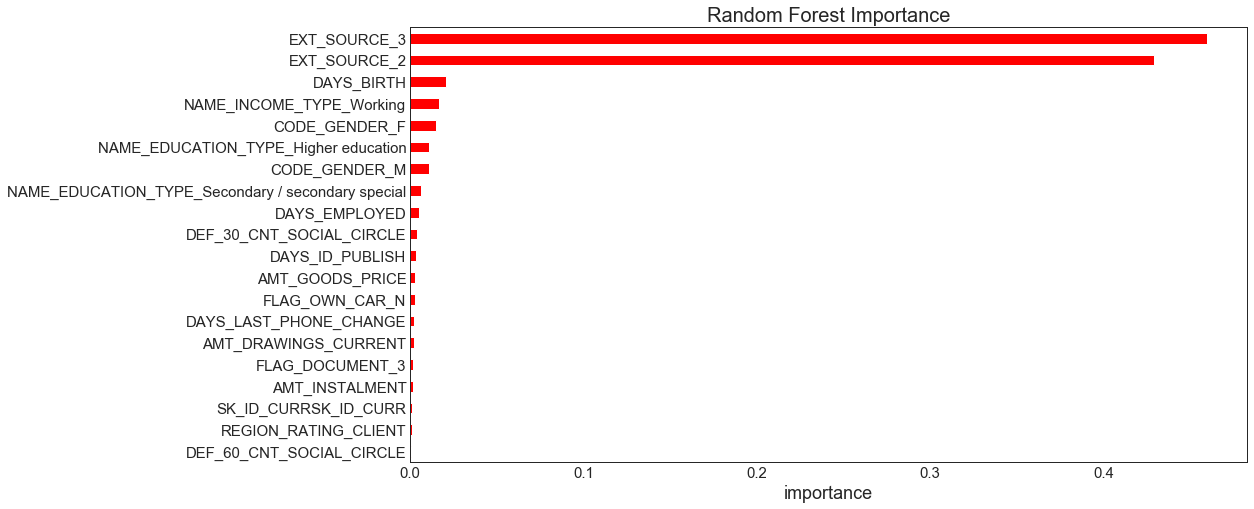

In [85]:
fi=pd.Series(dtc_ori.feature_importances_, index=train_X_ori.columns)
fn=fi.sort_values(ascending=True)
fn[-20:].plot(kind='barh', color='r', figsize=(15, 8))
plt.xlabel('importance', size=18)
plt.title('Decision Tree Importance', size=20)
plt.tick_params(labelsize=15)

### 4. Xgboost

In [184]:
xgb = XGBClassifier(max_depth=4, learning_rate=0.03, n_estimators=200,
                    objective='binary:logistic', subsample=0.6, colsample_bytree=0.6, seed=40)
xgb.fit(train_X , train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0,
              learning_rate=0.03, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=40,
              silent=None, subsample=0.6, verbosity=1)

In [185]:
xgb_pred = xgb.predict_proba(test_X) 
roc_auc_score(test_y, xgb_pred[:,1])

0.64694340150582